## Ordinary Least Squares 

With a n x k matrix as a design matrix and an n×1 vector y as the response variable, the OLS estimator can be calculated as:

$$ \hat{\beta} = (X'X)^{-1}X'Y$$

When using OLS, there are two main assumptions to verify: 
- Little to No Multicollinearity
- Homoscedascity 

In [1]:
# This autoformats all code cells into PEP 8 when run, feel free to comment out if not wanted
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
from IPython.display import display
import scipy as sp

<IPython.core.display.Javascript object>

In [3]:
# Loading in original Airbnb Data
df = pd.read_csv("../data/AB_NYC_2019.csv")
display(df)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


<IPython.core.display.Javascript object>

In [4]:
# Clean data
df.dropna(subset=["last_review", "name"], axis=0, inplace=True)
df.drop(["id", "host_name"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [5]:
# Create a subset of data without categorical features
df_sub = df[
    [
        "price",
        "latitude",
        "longitude",
        "minimum_nights",
        "number_of_reviews",
        "reviews_per_month",
        "calculated_host_listings_count",
        "availability_365",
    ]
]
display(df_sub)

,price,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,149,40.64749,-73.97237,1,9,0.21,6,365
1,225,40.75362,-73.98377,1,45,0.38,2,355
3,89,40.68514,-73.95976,1,270,4.64,1,194
4,80,40.79851,-73.94399,10,9,0.10,1,0
5,200,40.74767,-73.97500,3,74,0.59,1,129
...,...,...,...,...,...,...,...,...
48782,129,40.78099,-73.95366,1,1,1.00,1,147
48790,45,40.75104,-73.81459,1,1,1.00,6,339
48799,235,40.54179,-74.14275,1,1,1.00,1,87
48805,100,40.80787,-73.92400,1,2,2.00,1,40


<IPython.core.display.Javascript object>

<AxesSubplot:>

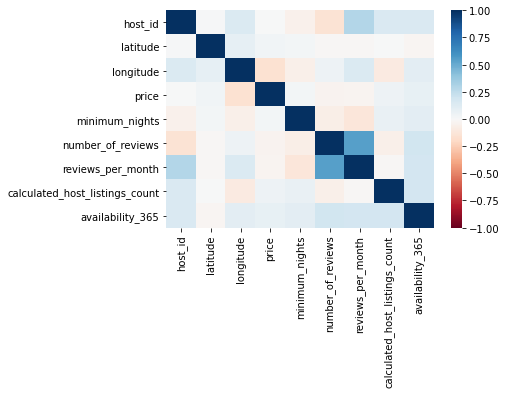

<IPython.core.display.Javascript object>

In [6]:
# Assumption 1: Multicollinearity
ryb = matplotlib.colors.LinearSegmentedColormap.from_list(
    "", ["green", "yellow", "red"]
)
corr = df_sub.corr()
corr.style.set_precision(3).background_gradient(cmap="RdBu", vmin=-1, vmax=1)
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="RdBu")

In [7]:
# Assumption 2: Homoscedascity
import scipy.stats as stats

stat, p = stats.levene(
    np.log(df["minimum_nights"]),
    np.log(df["number_of_reviews"]),
    np.log(df["reviews_per_month"]),
    np.log(df["calculated_host_listings_count"]),
    df["availability_365"],
    center="median",
)
p

0.0

<IPython.core.display.Javascript object>

Our assumption of little to no multicollinearity is satisfied, however the assumption of homoscedascity is not. We utilized a Brown-Forsythe test with the numerical features which resulted in a p value of 0. Since this is less than any possible alpha value we would reject the null and conclude the variances are in fact not equal. 

Although one of our assumptions is not met, we will continue with OLS with caution. 

In [8]:
# OLS
# Loading in cleaned data with dummy variables
data = pd.read_csv("../data/listings.csv")
display(data)

,Unnamed: 0,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,...,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,days_since_review
0,0,149,1,9,0.21,6,365,0,1,0,...,0,0,0,0,0,0,0,1,0,1235
1,1,225,1,45,0.38,2,355,0,0,1,...,0,0,0,0,0,0,1,0,0,1021
2,2,89,1,270,4.64,1,194,0,1,0,...,0,0,0,0,0,0,1,0,0,976
3,3,80,10,9,0.10,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1204
4,4,200,3,74,0.59,1,129,0,0,1,...,0,0,0,0,0,0,1,0,0,989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38832,38832,129,1,1,1.00,1,147,0,0,1,...,0,0,0,0,0,0,0,1,0,974
38833,38833,45,1,1,1.00,6,339,0,0,0,...,0,0,0,0,0,0,0,1,0,974
38834,38834,235,1,1,1.00,1,87,0,0,0,...,0,0,0,0,0,0,0,1,0,974
38835,38835,100,1,2,2.00,1,40,1,0,0,...,0,0,0,0,0,0,1,0,0,974


<IPython.core.display.Javascript object>

In [9]:
# Drop "Unnamed: 0" column
data.drop(
    ["Unnamed: 0",], axis=1, inplace=True,
)
display(data)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,...,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,days_since_review
0,149,1,9,0.21,6,365,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1235
1,225,1,45,0.38,2,355,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1021
2,89,1,270,4.64,1,194,0,1,0,0,...,0,0,0,0,0,0,1,0,0,976
3,80,10,9,0.10,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1204
4,200,3,74,0.59,1,129,0,0,1,0,...,0,0,0,0,0,0,1,0,0,989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38832,129,1,1,1.00,1,147,0,0,1,0,...,0,0,0,0,0,0,0,1,0,974
38833,45,1,1,1.00,6,339,0,0,0,1,...,0,0,0,0,0,0,0,1,0,974
38834,235,1,1,1.00,1,87,0,0,0,0,...,0,0,0,0,0,0,0,1,0,974
38835,100,1,2,2.00,1,40,1,0,0,0,...,0,0,0,0,0,0,1,0,0,974


<IPython.core.display.Javascript object>

Our new dataframe contains:   
38837 rows x 232 columns 


In [10]:
# Setting up variables to calculate the coefficients for an Ordinary Least Squares regression
Y = (data["price"]).values
X_Data = data.drop(["price"], axis=1)
X = (data.drop(["price"], axis=1)).values

<IPython.core.display.Javascript object>

In [11]:
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()
# x = sc.fit_transform(X)

<IPython.core.display.Javascript object>

In [13]:
def standardizeData(data):
    # Takes pandas dataframe and standardizes it iteratively
    for column in data:
        data[column] = (data[column] - np.mean(data[column])) / np.std(data[column])
    return data


standardizeData(X_Data)

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,...,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,days_since_review
0,-0.280024,-0.421282,-0.692308,0.031748,1.930879,-0.151909,1.166889,-0.865278,-0.365372,-0.090283,...,-0.297765,-0.005074,-0.057504,-0.043097,-0.016832,-0.066306,-1.047933,1.094830,-0.149226,-0.035735
1,-0.280024,0.325783,-0.591146,-0.120358,1.853680,-0.151909,-0.856980,1.155698,-0.365372,-0.090283,...,-0.297765,-0.005074,-0.057504,-0.043097,-0.016832,-0.066306,0.954260,-0.913384,-0.149226,-0.552946
2,-0.280024,4.994943,1.943843,-0.158385,0.610778,-0.151909,1.166889,-0.865278,-0.365372,-0.090283,...,-0.297765,-0.005074,-0.057504,-0.043097,-0.016832,-0.066306,0.954260,-0.913384,-0.149226,-0.661706
3,0.237639,-0.421282,-0.757765,-0.158385,-0.886880,-0.151909,-0.856980,1.155698,-0.365372,-0.090283,...,-0.297765,-0.005074,-0.057504,-0.043097,-0.016832,-0.066306,0.954260,-0.913384,-0.149226,-0.110658
4,-0.164988,0.927586,-0.466182,-0.158385,0.108985,-0.151909,-0.856980,1.155698,-0.365372,-0.090283,...,-0.297765,-0.005074,-0.057504,-0.043097,-0.016832,-0.066306,0.954260,-0.913384,-0.149226,-0.630286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38832,-0.280024,-0.587297,-0.222204,-0.158385,0.247943,-0.151909,-0.856980,1.155698,-0.365372,-0.090283,...,-0.297765,-0.005074,-0.057504,-0.043097,-0.016832,-0.066306,-1.047933,1.094830,-0.149226,-0.666540
38833,-0.280024,-0.587297,-0.222204,0.031748,1.730161,-0.151909,-0.856980,-0.865278,2.736936,-0.090283,...,-0.297765,-0.005074,-0.057504,-0.043097,-0.016832,-0.066306,-1.047933,1.094830,-0.149226,-0.666540
38834,-0.280024,-0.587297,-0.222204,-0.158385,-0.215250,-0.151909,-0.856980,-0.865278,-0.365372,11.076313,...,-0.297765,-0.005074,-0.057504,-0.043097,-0.016832,-0.066306,-1.047933,1.094830,-0.149226,-0.666540
38835,-0.280024,-0.566545,0.372864,-0.158385,-0.578085,6.582893,-0.856980,-0.865278,-0.365372,-0.090283,...,-0.297765,-0.005074,-0.057504,-0.043097,-0.016832,-0.066306,0.954260,-0.913384,-0.149226,-0.666540


<IPython.core.display.Javascript object>

In [14]:
x = (X_Data).values

<IPython.core.display.Javascript object>

In [15]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, Y, test_size=0.2, random_state=42)

<IPython.core.display.Javascript object>

In [16]:
def CostFunction(x, y, w, b):
    cost = np.sum((((x.dot(w) + b) - y) ** 2) / (2 * len(y)))
    return cost


def GradientDescent(x, y, w, b, learning_rate, epochs):
    cost_list = [0] * epochs

    for epoch in range(epochs):
        z = x.dot(w) + b
        loss = z - y

        weight_gradient = x.T.dot(loss) / len(y)
        bias_gradient = np.sum(loss) / len(y)

        w = w - learning_rate * weight_gradient
        b = b - learning_rate * bias_gradient

        cost = CostFunction(x, y, w, b)
        cost_list[epoch] = cost

        if epoch % (epochs / 10) == 0:
            print("Cost is:", cost)

    return w, b, cost_list

<IPython.core.display.Javascript object>

In [17]:
w, b, c = GradientDescent(
    Xtrain, Ytrain, np.zeros(Xtrain.shape[1]), 0, 0.002, epochs=15000
)

Cost is: 30634.060595797666
Cost is: 18007.070748828268
Cost is: 17973.595154051985
Cost is: 17973.02017792478
Cost is: 17972.974450899455
Cost is: 17972.969963652416
Cost is: 17972.96950696508
Cost is: 17972.969459783802
Cost is: 17972.969454869693
Cost is: 17972.969454355432


<IPython.core.display.Javascript object>

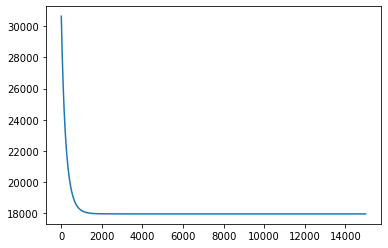

<IPython.core.display.Javascript object>

In [18]:
plt.plot(c)

In [19]:
def predict(X, w, b):
    return X.dot(w) + b

y_pred = predict(Xtest, w, b)
display(y_pred)

array([126.88986894, 196.02972285, 176.42746798, ..., 125.13024839,
       213.75446738, 180.46958149])

<IPython.core.display.Javascript object>

In [20]:
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y - y.mean()) ** 2)

    r2 = 1 - (rss / tss)
    return r2

r2score(y_pred, Ytest)

0.2064706336727703

<IPython.core.display.Javascript object>

In [ ]:
# Finding the beta coefficients
beta_hat = sp.linalg.inv(X.T @ X) @ X.T @ Y
beta_hat

In [ ]:
# Lets take the coefficients and the names of our columns and put them into a dataframe
variables = X_Data.columns.tolist()
model_coef = pd.DataFrame({"coef": beta_hat, "names": variables})
display(model_coef[model_coef["coef"] != 0].sort_values(by="coef", ascending=False))

In [ ]:
# Now, we will use sci-kit learn to test the strength of our model
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import mean_absolute_error

# # First, we split the data into an 80:20 train:test ratio
# x_train, x_test, y_train, y_test = train_test_split(
#     X, Y, test_size=0.2, random_state=42
# )

# # Create an object of Linear Regression class
# LR = LinearRegression(fit_intercept=False)

# # Fit the training data
# LR.fit(x_train, y_train)

# # Finding the beta coefficients
# beta_hat_2 = sp.linalg.inv(x_train.T @ x_train) @ x_train.T @ y_train
# display(np.array(beta_hat_2))

In [ ]:
# Predict Y using our X test data
# y_prediction = LR.predict(x_test)

# # Predict the accuracy score
# score = r2_score(y_test, y_prediction)
# print("The r2 score is", score)
# print("The mean absolute error is", mean_absolute_error(y_test, y_prediction))
# print("The mean squared error is", mean_squared_error(y_test, y_prediction))
# print(
#     "The root mean squared error is", np.sqrt(mean_squared_error(y_test, y_prediction))
# )

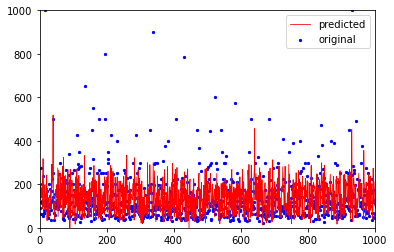

<IPython.core.display.Javascript object>

In [21]:
# Plot the first 1000 values to check model accuracy
x_ax = range(len(Xtest))
plt.scatter(x_ax, Ytest, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.xlim([0, 1000])
plt.ylim([0, 1000])
plt.legend()
plt.show()